# Paleocurrent data analysis#

**Calculates mean azimuth and standard deviation of a set of paleocurrent data and plots data in a rose diagram.**

Input file must be in excel format.

Each column contains one type of paleocurrent data, and first row contains a text heading (ex: "Flutes").

The number of bins can be set manually. The default is set to 36 bins --> each bin ranges 10º.
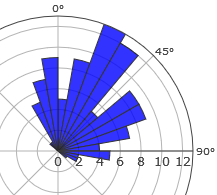


**Importing modules and function definitions**

In [ ]:
#importing modules
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# defining statistical functions
# polar mean function
def polar_mean(x):
  cos_a = 0
  sin_a = 0
  for a in x:                         #loop to sum the sinus and cosinus of all directional data
    cos_a += np.cos(np.radians(a))
    sin_a += np.sin(np.radians(a))
  mean = np.degrees(np.arctan2(sin_a,cos_a))    # calculates the mean from arctang of the the sum of sinus and cosinus
  return(mean)

# Standard deviation function
def standard_deviation(x,x_mean):
    sum_squared_diferences = 0
    for a in x:                       #loop to calculate the squared difference of the individual directions to the mean
        squared_diferences = (2*np.degrees(np.arcsin(np.sqrt(
            (np.cos(np.radians(a))-np.cos(np.radians(x_mean)))**2+
            (np.sin(np.radians(a))-np.sin(np.radians(x_mean)))**2)
            /2)))**2
        sum_squared_diferences += squared_diferences    #summatory of squared differences
    std_dev = np.sqrt(sum_squared_diferences/len(x))    # standard deviation= squared root of summatory divided by number of data
    return(std_dev)

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


**Reading input file**

In [ ]:
from tkinter import *
from tkinter import filedialog
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)

filename = filedialog.askopenfilename(filetypes = (('excel XLS', '*.xls'),('excel XLSX', '*.xlsx'))) 
print(filename)
data = pd.read_excel(filename)
data.info()

# Selecting the column in the dataframe that contains the dataset
len(data.columns)
option ={}
for n in range(len(data.columns)):
    key_value_pair ={n+1:data.columns[n]}
    option.update(key_value_pair)

column_number = int(input(color.BOLD + color.RED + 'choose dataset ' + str(option)+':'))
print(color.BOLD + str.upper(option[column_number]+ '  selected') + color.END)
selected_data = data[option[column_number]].dropna()

**Calculating statistics**

In [ ]:
#Calculate mean direction and standard error

paleocurrent_mean = polar_mean(selected_data)
paleocurrent_std_dev = standard_deviation(selected_data,paleocurrent_mean)

statistics = [[len(selected_data), int(paleocurrent_mean), paleocurrent_std_dev ]]

df_stats = pd.DataFrame(statistics, index = [option[column_number]], columns =['N', 'mean', 'standard dev'])
df_stats.round(1)

**Plotting Rose diagram**

In [ ]:
#set manually the number of bins.
number_of_bins = 36   #set number of bins manually

#The frequency (radius) and azimuth of bins for rose diagram is stored in bin_sahpes:
bin_shapes = np.histogram(selected_data, bins = number_of_bins, range = (0,360)) 
frequency = bin_shapes[0] #frequency of each bin
azimuth = []  #array of azimuths of bins
for n in range(len(bin_shapes[1])-1):
  azimuth.append((bin_shapes[1][n]+bin_shapes[1][n+1])/2) #find the median azimuth of each bin
angular_width = (azimuth[-1]-azimuth[0])/(len(azimuth)-1) #angular width of bins

# Plotting rose diagram
fig = go.Figure(go.Barpolar(
    r=frequency,
    theta=azimuth,
    width=angular_width,
    marker_color= "blue",
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8
))

fig.update_layout(
    template=None,
    polar = dict(
        radialaxis = dict(range=[0, frequency.max()], showticklabels= True, ticks=''),
        angularaxis = dict(showticklabels= True, ticks='',
        tickfont_size = 10,
        rotation = 90,
        direction = "clockwise")
))
fig.show()